<a href="https://colab.research.google.com/github/mirpouya/Western-University/blob/main/Assignment_2_MachineLearning%20Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grade: /100 + 15 Bonus

## Instructions



* Once the notebook is complete, restart your kernel and rerun your cells

* Submit this notebook to owl by the deadline

* You may use any python library functions you wish to complete the Lab assignment.



This notebook contains the questions for Assignment 2. Make sure to complete this assignment individually and appropriately reference all external code and documentation used.

### Preliminaries

Feel free to add any libraries to the Preliminaries. However, be mindful of every question's restrictions as some may exclude use of some functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report, roc_curve, auc, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models

## Part 1 - Multi-Layer Perceptron (MLP) for Regression (65 pts)

### Dataset

The dataset `startup_success_dataset.csv` contains information on startup companies and is designed to predict the success of these companies based on various features. Your tasks involve data preprocessing, exploratory data analysis, applying machine learning models, and evaluating their performance and fairness.

### Part1 Task A - Data Loading and Preprocessing (10 pts)

Load the provided startup success dataset and prepare it for analysis. Perform necessary preprocessing steps to handle any data inconsistencies and prepare the data for machine learning models.

1. Load the dataset and  remove any unnecessary columns.
2. Check for missing values and handle them appropriately (handle missing values separately for numerical and categorical columns. For numerical columns, fill missing values with the mean of their respective columns. For categorical data, if missing values exist, fill them with the mode (most frequent value).
3. Encode categorical variables using appropriate encoding techniques.
4. Split the dataset into features and target variables (`SuccessScore`).


In [2]:
startup_dataset = pd.read_csv("/content/startup_success_dataset.csv")
startup_dataset.head()

,StartupID,Industry,Age,Location,Funding,EmployeeCount,ProductCount,Patents,Partnerships,AnnualRevenue,ProfitMargin,MarketShare,CustomerSatisfaction,SuccessScore
0,1,Finance,17,Asia,188.165509,343,7,5,8,26.657424,6.514471,28.991712,71.305764,63.721391
1,2,Education,9,Asia,52.229703,47,8,1,3,65.216576,-11.429246,8.125782,64.377673,86.092406
2,3,Tech,1,North America,86.216534,376,5,14,2,77.067519,25.855096,33.709881,58.016024,65.511363
3,4,Finance,20,Europe,174.609685,423,7,1,3,21.948196,27.398470,6.673444,64.107779,67.447699
4,5,Finance,13,Europe,168.465747,492,8,1,3,64.292718,18.357728,40.292885,61.662585,71.060720


In [3]:
# checking for any missing value
startup_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   StartupID             1000 non-null   int64  
 1   Industry              1000 non-null   object 
 2   Age                   1000 non-null   int64  
 3   Location              1000 non-null   object 
 4   Funding               1000 non-null   float64
 5   EmployeeCount         1000 non-null   int64  
 6   ProductCount          1000 non-null   int64  
 7   Patents               1000 non-null   int64  
 8   Partnerships          1000 non-null   int64  
 9   AnnualRevenue         1000 non-null   float64
 10  ProfitMargin          1000 non-null   float64
 11  MarketShare           1000 non-null   float64
 12  CustomerSatisfaction  1000 non-null   float64
 13  SuccessScore          1000 non-null   float64
dtypes: float64(6), int64(6), object(2)
memory usage: 109.5+ KB


In [4]:
startup_dataset.isnull().sum()

StartupID               0
Industry                0
Age                     0
Location                0
Funding                 0
EmployeeCount           0
ProductCount            0
Patents                 0
Partnerships            0
AnnualRevenue           0
ProfitMargin            0
MarketShare             0
CustomerSatisfaction    0
SuccessScore            0
dtype: int64

No null value

Industry and Location are categorical variables

In [5]:
startup_dataset["Industry"].unique()

array(['Finance', 'Education', 'Tech', 'Health'], dtype=object)

In [6]:
startup_dataset["Location"].unique()

array(['Asia', 'North America', 'Europe'], dtype=object)

In [7]:
# encoding the variables

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables
startup_dataset['Industry_encoded'] = label_encoder.fit_transform(startup_dataset['Industry'])
startup_dataset['Location_encoded'] = label_encoder.fit_transform(startup_dataset['Location'])

startup_dataset.head()

,StartupID,Industry,Age,Location,Funding,EmployeeCount,ProductCount,Patents,Partnerships,AnnualRevenue,ProfitMargin,MarketShare,CustomerSatisfaction,SuccessScore,Industry_encoded,Location_encoded
0,1,Finance,17,Asia,188.165509,343,7,5,8,26.657424,6.514471,28.991712,71.305764,63.721391,1,0
1,2,Education,9,Asia,52.229703,47,8,1,3,65.216576,-11.429246,8.125782,64.377673,86.092406,0,0
2,3,Tech,1,North America,86.216534,376,5,14,2,77.067519,25.855096,33.709881,58.016024,65.511363,3,2
3,4,Finance,20,Europe,174.609685,423,7,1,3,21.948196,27.398470,6.673444,64.107779,67.447699,1,1
4,5,Finance,13,Europe,168.465747,492,8,1,3,64.292718,18.357728,40.292885,61.662585,71.060720,1,1


In [8]:
# drop the categorical columns now

startup_dataset.drop(columns=["Industry", "Location"], inplace=True)
startup_dataset.head(5)

,StartupID,Age,Funding,EmployeeCount,ProductCount,Patents,Partnerships,AnnualRevenue,ProfitMargin,MarketShare,CustomerSatisfaction,SuccessScore,Industry_encoded,Location_encoded
0,1,17,188.165509,343,7,5,8,26.657424,6.514471,28.991712,71.305764,63.721391,1,0
1,2,9,52.229703,47,8,1,3,65.216576,-11.429246,8.125782,64.377673,86.092406,0,0
2,3,1,86.216534,376,5,14,2,77.067519,25.855096,33.709881,58.016024,65.511363,3,2
3,4,20,174.609685,423,7,1,3,21.948196,27.398470,6.673444,64.107779,67.447699,1,1
4,5,13,168.465747,492,8,1,3,64.292718,18.357728,40.292885,61.662585,71.060720,1,1


In [9]:
# split dataset in features and target

X_features = startup_dataset.drop(columns="SuccessScore")
y_target = startup_dataset["SuccessScore"]

In [10]:
X_features.shape, y_target.shape

((1000, 13), (1000,))

In [11]:
X_features.head(5)

,StartupID,Age,Funding,EmployeeCount,ProductCount,Patents,Partnerships,AnnualRevenue,ProfitMargin,MarketShare,CustomerSatisfaction,Industry_encoded,Location_encoded
0,1,17,188.165509,343,7,5,8,26.657424,6.514471,28.991712,71.305764,1,0
1,2,9,52.229703,47,8,1,3,65.216576,-11.429246,8.125782,64.377673,0,0
2,3,1,86.216534,376,5,14,2,77.067519,25.855096,33.709881,58.016024,3,2
3,4,20,174.609685,423,7,1,3,21.948196,27.398470,6.673444,64.107779,1,1
4,5,13,168.465747,492,8,1,3,64.292718,18.357728,40.292885,61.662585,1,1


In [12]:
X_features.columns

Index(['StartupID', 'Age', 'Funding', 'EmployeeCount', 'ProductCount',
       'Patents', 'Partnerships', 'AnnualRevenue', 'ProfitMargin',
       'MarketShare', 'CustomerSatisfaction', 'Industry_encoded',
       'Location_encoded'],
      dtype='object')

In [13]:
for column in X_features.columns:
  print(column)

StartupID
Age
Funding
EmployeeCount
ProductCount
Patents
Partnerships
AnnualRevenue
ProfitMargin
MarketShare
CustomerSatisfaction
Industry_encoded
Location_encoded


### Part1 Task B - Exploratory Data Analysis (EDA) (10 pts)

1. Visualize the distribution of key features and the target variable.
3. Generate a heatmap of the correlation matrix to identify strongly correlated features.

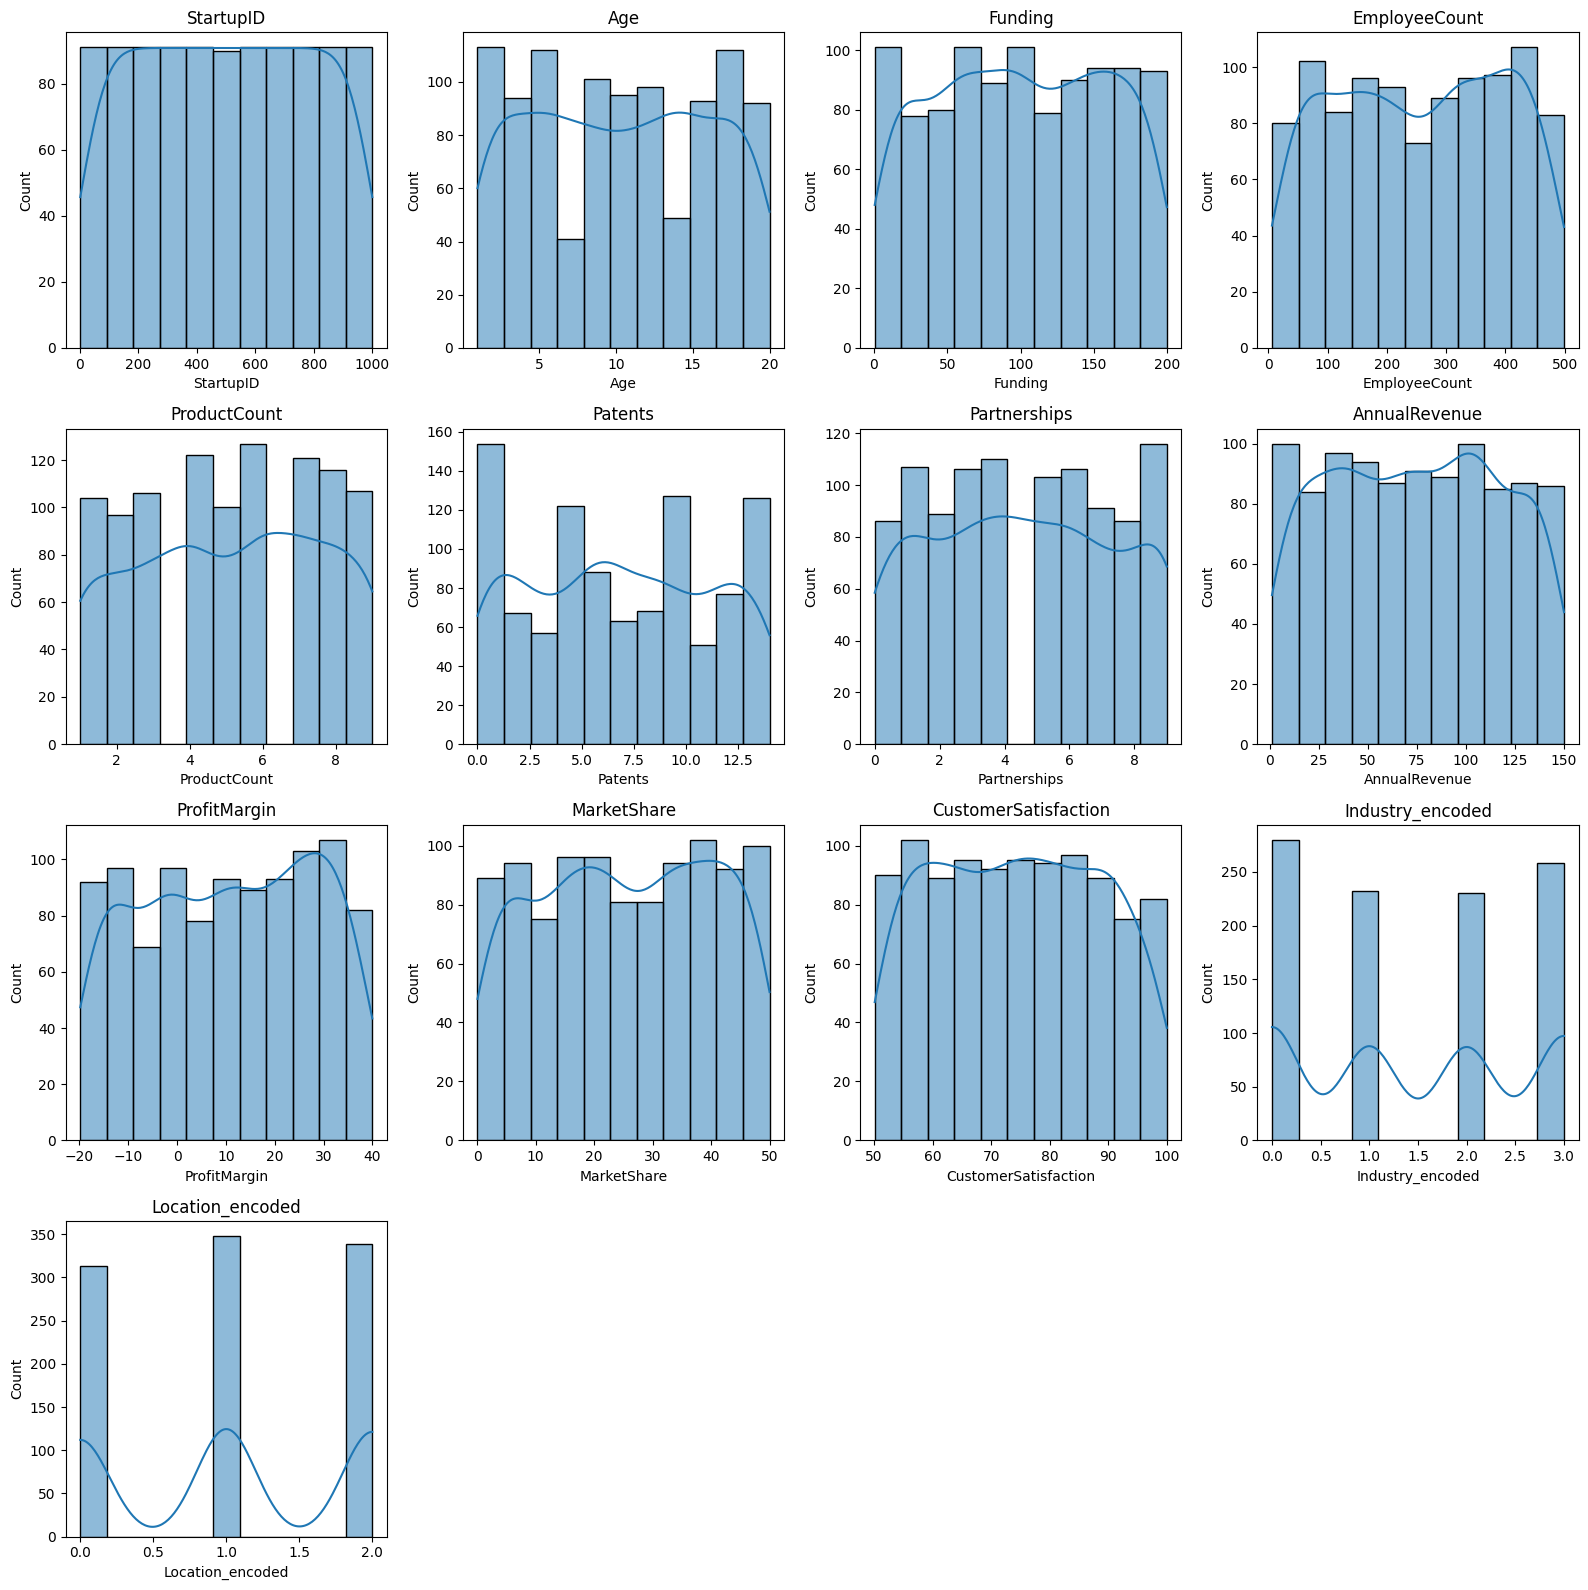

In [14]:
num_features = len(X_features.columns)

num_rows = (num_features - 1) // 4 + 1  # Calculate number of rows needed dynamically

plt.figure(figsize=(16, 4 * num_rows))  # Adjust the figure height based on the number of rows

for i, feature in enumerate(X_features.columns, 1):
    plt.subplot(num_rows, 4, i)  # Adjust the number of columns dynamically
    sns.histplot(X_features[feature], kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()

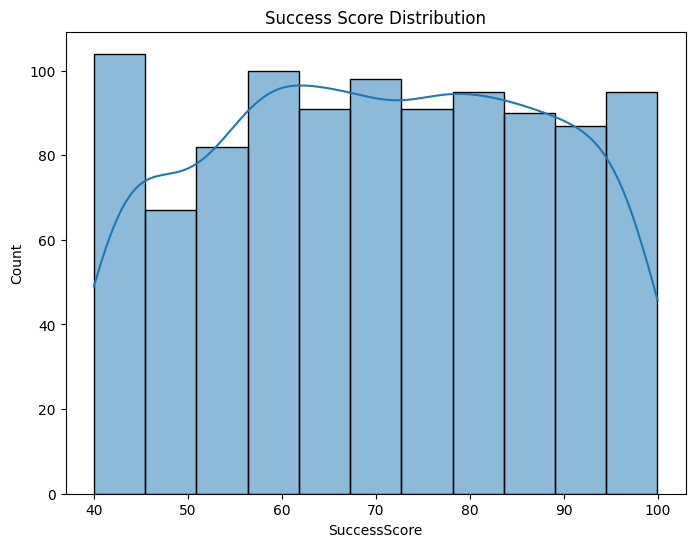

In [15]:
# Plot histogram for the target variable

plt.figure(figsize=(8, 6))
sns.histplot(y_target, kde=True)
plt.title('Success Score Distribution')
plt.show()

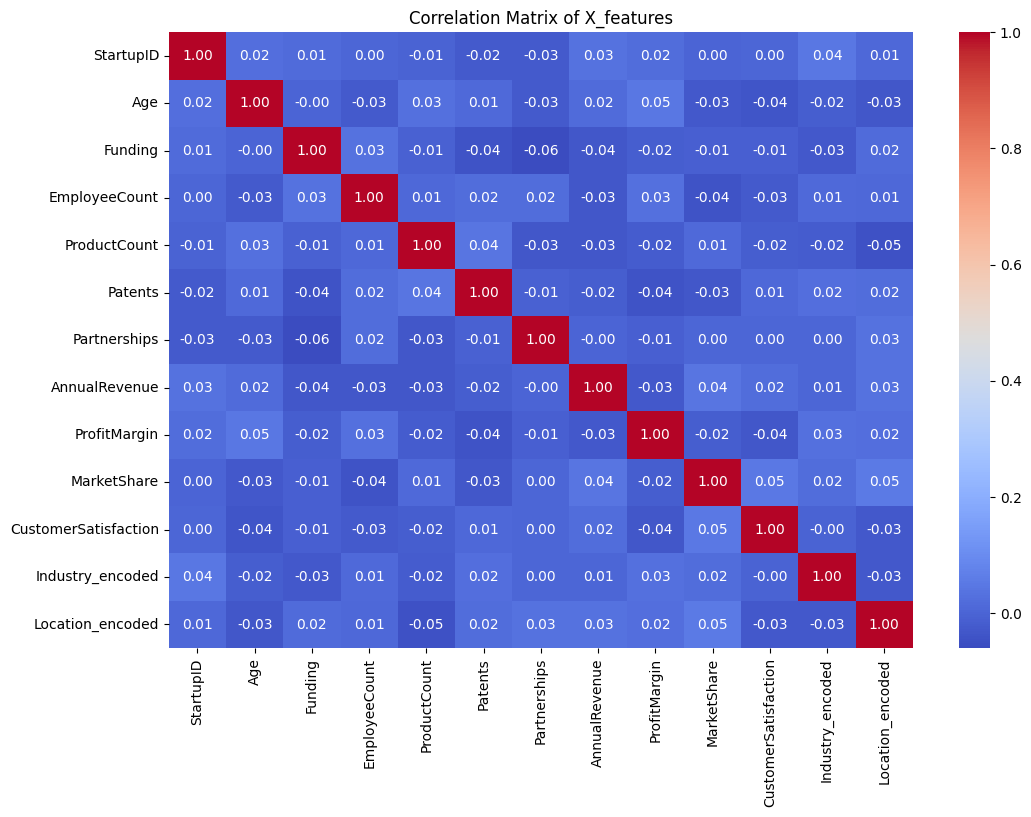

In [16]:
# Calculate the correlation matrix
correlation_matrix = X_features.corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of X_features')
plt.show()

No correlation between features at all!

### Part1 Task C - Feature Engineering and PCA (10 pts)

1. Split the data into training and testing sets with 8:2 ratio and standardize the feature set.
2. Plot the explained variance ratio of the principal components and determine the number of components to retain 80% of variance.
3. Apply PCA using the number found in the previous step to reduce the feature size.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 13) (800,)
(200, 13) (200,)


In [18]:
# scaling the training data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [19]:
# Fit the PCA to scaled training data

pca = PCA()
pca.fit(X_train_scaled)

PCA()

In [20]:
pca.explained_variance_ratio_

array([0.09375376, 0.0879233 , 0.08466057, 0.08450467, 0.0808654 ,
       0.07826885, 0.07685041, 0.07340308, 0.07193725, 0.07046112,
       0.06875923, 0.06557667, 0.06303568])

In [21]:
# summing all the variances

np.cumsum(pca.explained_variance_ratio_)[-1]

1.0

It means all the components are significant, and PCA does not reduce the dimensionality.

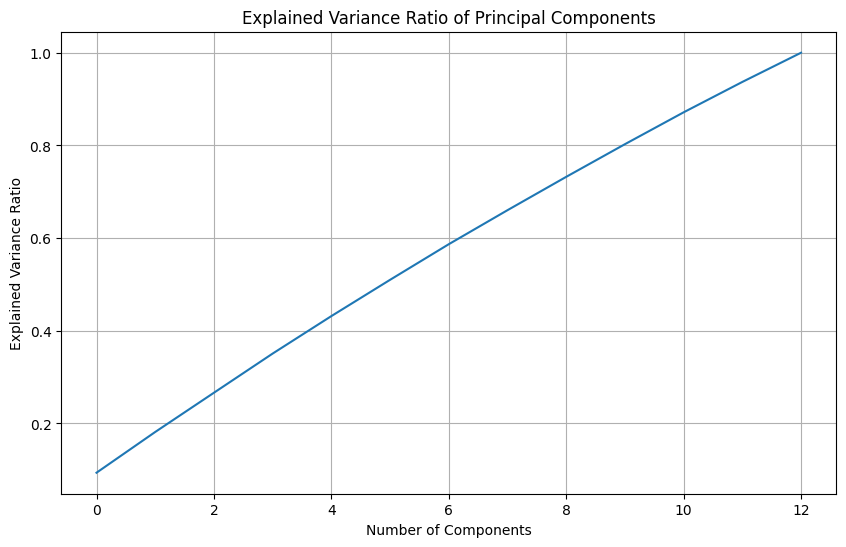

In [22]:
# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.grid(True)
plt.show()

In [23]:
# Determine the number of components to retain 80% of variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components_80 = np.argmax(cumulative_variance_ratio >= 0.8)
print("Number of components to retain 80% of variance:", n_components_80)

Number of components to retain 80% of variance: 9


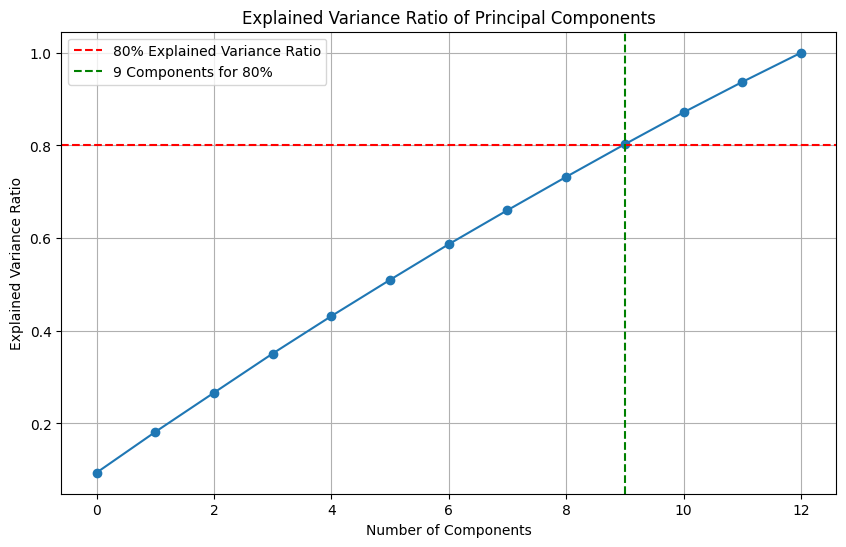

Number of components to retain 80% of variance: 9


In [24]:
# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.grid(True)

# Plot the line for 80% explained variance ratio
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Explained Variance Ratio')
plt.legend()

# Find the number of components needed for 80% explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components_80 = np.argmax(cumulative_variance_ratio >= 0.8)
plt.axvline(x=n_components_80, color='g', linestyle='--', label=f'{n_components_80} Components for 80%')
plt.legend()

plt.show()

print("Number of components to retain 80% of variance:", n_components_80)

### Part1 Task D - MLP for Regression  (15 pts)

1. Design and train two MLP regressors for 100 epochs and batch size 32 using 3 fold cross validation:
- Model 1 without hidden layer
- Model 2 with 1 hidden layer of size 50 neurons

Incorporate L2 regularization in models, use Adam optimizer with a learning rate of 0.01 and Relu activation function in hidden layer.

2. Evaluate the model's performance on the test set using Mean Squared Error (MSE) and Mean Absolute Error (MAE) metrics.
3. **Written Answer** Compare the models 1 and 2 and write your conclusion.

<h3> <b> Model 1, without hidden layer </b> </h3>

In [25]:
X_test_scaled.shape[1]

13

In [26]:
model_1 = Sequential([
        Dense(1, input_dim=X_test_scaled.shape[1], kernel_regularizer=tf.keras.regularizers.l2(0.01))])

model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss='mean_squared_error',
                  metrics=['mean_absolute_error'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
# 3-fold cross-validation
kf = KFold(n_splits=3, shuffle=True)

mse_scores = []
mae_scores = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Create and train model
    model = model_1
    model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=0)

    # Evaluate model on validation set
    y_pred = model.predict(X_val_fold)
    mse = mean_squared_error(y_val_fold, y_pred)
    mae = mean_absolute_error(y_val_fold, y_pred)

    mse_scores.append(mse)
    mae_scores.append(mae)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [29]:
print("Mean Squared Error (MSE) scores:", mse_scores)
print("Mean Absolute Error (MAE) scores:", mae_scores)
print("Average MSE:", np.mean(mse_scores))
print("Average MAE:", np.mean(mae_scores))

Mean Squared Error (MSE) scores: [401.35514737733445, 379.0120838043024, 373.5047258028807]
Mean Absolute Error (MAE) scores: [16.417204875261785, 16.000802592278013, 16.17938642146559]
Average MSE: 384.62398566150586
Average MAE: 16.19913129633513


In [30]:
model_2 = Sequential([
    Dense(50, input_dim = X_train_scaled.shape[1], activation="relu", kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    Dense(1)
])

model_2.compile(optimizer = Adam(learning_rate=0.01), loss="mean_squared_error", metrics=["mean_absolute_error"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
# 3-fold cross-validation
kf = KFold(n_splits=3, shuffle=True)

mse_scores_model2 = []
mae_scores_model2 = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train model_2
    model_2.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=0)

    # Evaluate model_2 on validation set
    val_loss, val_mae = model_2.evaluate(X_val_fold, y_val_fold, verbose=0)

    mse_scores_model2.append(val_loss)
    mae_scores_model2.append(val_mae)

# Calculate mean of evaluation metrics for model_2
avg_mse_model2 = np.mean(mse_scores_model2)
avg_mae_model2 = np.mean(mae_scores_model2)

# Print the evaluation metrics for model_2
print("Model 2 - MSE:", avg_mse_model2)
print("Model 2 - MAE:", avg_mae_model2)

Model 2 - MSE: 383.8227132161458
Model 2 - MAE: 15.992342313130697


In [32]:
print("Mean Squared Error (MSE) scores:", mse_scores_model2)
print("Mean Absolute Error (MAE) scores:", mae_scores_model2)
print("Average MSE:", np.mean(mse_scores_model2))
print("Average MAE:", np.mean(mae_scores_model2))

Mean Squared Error (MSE) scores: [402.4996337890625, 433.4917297363281, 315.4767761230469]
Mean Absolute Error (MAE) scores: [16.49030303955078, 16.27751922607422, 15.20920467376709]
Average MSE: 383.8227132161458
Average MAE: 15.992342313130697


In [33]:
# Evaluate model_1 on the test set
y_pred_1 = model_1.predict(X_test)
mse_1 = mean_squared_error(y_test, y_pred_1)
mae_1 = mean_absolute_error(y_test, y_pred_1)

print("Model 1 - Test MSE:", mse_1)
print("Model 1 - Test MAE:", mae_1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model 1 - Test MSE: 347.8384238306378
Model 1 - Test MAE: 15.70122356810622


In [34]:
# Evaluate model_2 on the test set
y_pred_2 = model_2.predict(X_test)
mse_2 = mean_squared_error(y_test, y_pred_2)
mae_2 = mean_absolute_error(y_test, y_pred_2)

print("Model 2 - Test MSE:", mse_2)
print("Model 2 - Test MAE:", mae_2)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Model 2 - Test MSE: 360.5502482990347
Model 2 - Test MAE: 16.064002845352285


<h3> <b> ******************* EXPLANATION INCLUDE HERE ********************* </B> </h3>

**Place holder for Written Answer**



### Part1 TaskE - Gridsearch for Hyperparameter Optimization (HPO) (20 pts)

1. Define a range of potential values for hyperparameters as follows:
    - `hidden_layer_sizes`:50, 100, 150
    - `activation`: tanh','relu'
    - `learning rate`: 0.0001, 0.001, 0.01
    
2. Use GridSearchCV to find the best hyperparameter values based on 3 fold cross-validation on MLP model2 from TaskD.
3. Retrain the model using the optimized hyperparameters and evaluate its performance.

In [37]:
from sklearn.neural_network import MLPRegressor

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=15)

# Creating MLP Regressor with specified parameters
mlp_regressor = MLPRegressor(hidden_layer_sizes=(50,),
                             activation='relu',
                             solver='adam',
                             alpha=0.0001,  # L2 regularization parameter
                             learning_rate_init=0.01,
                             max_iter=100,
                             batch_size=32,
                             random_state=15)

In [42]:
# Creating a pipeline with standardization and MLP Regressor
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(StandardScaler(), mlp_regressor)

In [43]:
# Performing 3-fold cross validation
kf = KFold(n_splits=3, shuffle=True, random_state=15)

In [45]:
mse_scores = []
mae_scores = []

for train_index, val_index in kf.split(X_train):
    X_train_cv, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_cv, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

    # Fitting the model
    pipeline.fit(X_train_cv, y_train_cv)

    # Predicting on the validation set
    y_pred = pipeline.predict(X_val)

    # Calculating MSE and MAE for validation set
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)

    mse_scores.append(mse)
    mae_scores.append(mae)

# Calculating average scores for validation set
avg_mse_val = np.mean(mse_scores)
avg_mae_val = np.mean(mae_scores)

print("Average MSE (Validation):", avg_mse_val)
print("Average MAE (Validation):", avg_mae_val)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Average MSE (Validation): 367.5216902546933
Average MAE (Validation): 16.167027444341393


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [46]:
# Fitting the model on the whole training set
pipeline.fit(X_train, y_train)

# Predicting on the test set
y_pred_test = pipeline.predict(X_test)

# Calculating MSE and MAE for test set
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("MSE (Test):", mse_test)
print("MAE (Test):", mae_test)

MSE (Test): 355.9547814430938
MAE (Test): 16.138650118878935


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [47]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=15)

mlp_regressor = MLPRegressor(max_iter=100, random_state=42)

# Creating a pipeline with standardization and MLP Regressor
pipeline = make_pipeline(StandardScaler(), mlp_regressor)

# Define a range of potential values for hyperparameters
param_grid = {
    'mlpregressor__hidden_layer_sizes': [(50,), (100,), (150,)],
    'mlpregressor__activation': ['tanh', 'relu'],
    'mlpregressor__learning_rate_init': [0.0001, 0.001, 0.01]
}

# Using GridSearchCV to find the best hyperparameter values based on 3 fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('mlpregressor',
                                        MLPRegressor(max_iter=100,
                                                     random_state=42))]),
             param_grid={'mlpregressor__activation': ['tanh', 'relu'],
                         'mlpregressor__hidden_layer_sizes': [(50,), (100,),
                                                              (150,)],
                         'mlpregressor__learning_rate_init': [0.0001, 0.001,
                                                              0.01]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=15)

# Creating MLP Regressor
mlp_regressor = MLPRegressor(max_iter=100, random_state=42)

# Creating a pipeline with standardization and MLP Regressor
pipeline = make_pipeline(StandardScaler(), mlp_regressor)

# Define a range of potential values for hyperparameters
param_grid = {
    'mlpregressor__hidden_layer_sizes': [(50,), (100,), (150,)],
    'mlpregressor__activation': ['tanh', 'relu'],
    'mlpregressor__learning_rate_init': [0.0001, 0.001, 0.01]
}

# Using GridSearchCV to find the best hyperparameter values based on 3 fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Retraining the model using the optimized hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluating the performance of the model on the test set
y_pred_test = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("Optimized Model - MSE (Test):", mse_test)
print("Optimized Model - MAE (Test):", mae_test)



## Part 2 - Binary Classification with a Custom MLP (35 pts)

### Background

You are provided with a schematic of a simple Multilayer Perceptron (MLP) neural network designed for binary classification. This network consists of an input layer with two binary inputs, $x_1$ and $x_2$, a hidden layer with two neurons, $h_1$ and $h_2$, and one output neuron, $y$. The weights and biases are pre-defined as follows:
- Weights from the input to hidden layer: $w_{11} = 20, w_{12} = -20, w_{21} = 20, w_{22} = -20$
- Biases for the hidden layer neurons: $b_{1} = -10, b_{2} = 30$
- Weights from the hidden layer to the output layer are both $20$.
- The bias for the output neuron is $-30$.


<!-- <img src="http://www.example.com/path/to/image/Picture1.png" width="300" height="300" /> -->

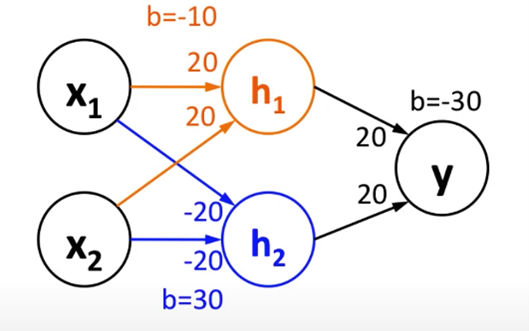


### Objective
Implement a Python program that simulates the described MLP network's forward pass and computes the output for different input combinations.



### Part2 Task A -  Sigmoid Activation Function (20 pts)
Write a function that takes binary inputs $x_1$ and $x_2$ and computes the output $y$ using a sigmoid activation function for both the hidden and output layers.
Calculate and print the predicted output for the following input pairs: (0,0), (0,1), (1,0), (1,1). Round the output to the nearest integer.


In [51]:
# Define the weights and biases

w_input_hidden = np.array([[20, -20], [20, -20]])
b_hidden = np.array([-10, 30])
w_hidden_output = np.array([20, 20])
b_output = -30

In [52]:
# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the forward pass function
def forward_pass(x1, x2):
    # Input layer
    input_layer = np.array([x1, x2])

    # Hidden layer
    hidden_layer_input = np.dot(input_layer, w_input_hidden) + b_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    # Output layer
    output_layer_input = np.dot(hidden_layer_output, w_hidden_output) + b_output
    output = sigmoid(output_layer_input)

    return np.round(output)

In [53]:
# Test the network with different input combinations
input_combinations = [(0, 0), (0, 1), (1, 0), (1, 1)]
for x1, x2 in input_combinations:
    output = forward_pass(x1, x2)
    print(f"For inputs {x1} and {x2}, predicted output is {output}")

For inputs 0 and 0, predicted output is 0.0
For inputs 0 and 1, predicted output is 1.0
For inputs 1 and 0, predicted output is 1.0
For inputs 1 and 1, predicted output is 0.0



### Part2 Task B - Linear Activation Function (10 pts)
Modify the function from TaskA to use a linear activation function instead of the sigmoid.
Calculate and print the predicted output for the same input pairs as above.


In [54]:
# Define the weights and biases
w_input_hidden = np.array([[20, -20], [20, -20]])
b_hidden = np.array([-10, 30])
w_hidden_output = np.array([20, 20])
b_output = -30

In [55]:
# Define the linear activation function
def linear_activation(x):
    return x

# Define the forward pass function
def forward_pass(x1, x2):
    # Input layer
    input_layer = np.array([x1, x2])

    # Hidden layer
    hidden_layer_input = np.dot(input_layer, w_input_hidden) + b_hidden
    hidden_layer_output = linear_activation(hidden_layer_input)

    # Output layer
    output_layer_input = np.dot(hidden_layer_output, w_hidden_output) + b_output
    output = linear_activation(output_layer_input)

    return output

In [56]:
# Test the network with different input combinations
input_combinations = [(0, 0), (0, 1), (1, 0), (1, 1)]
for x1, x2 in input_combinations:
    output = forward_pass(x1, x2)
    print(f"For inputs {x1} and {x2}, predicted output is {output}")

For inputs 0 and 0, predicted output is 370
For inputs 0 and 1, predicted output is 370
For inputs 1 and 0, predicted output is 370
For inputs 1 and 1, predicted output is 370



### Part2 TaskC - Hidden Neuron operation (3 pts)
Analyze the function of the hidden neuron $h_{1}$ when using a sigmoid activation function. Discuss which logical problem (\(e.g., AND, OR, XOR\)) \$h_{1}$ is solving.


<b> It is or since the only time that the output is negative, is when both x1, x2 are zero </b>



### Part2 Task D - MLP operation (2 pts)
Consider the entire network with a sigmoid activation function. Discuss which logical problem the MLP is designed to solve considering the weights and biases configuration.



## Part 3 - Convolutional Neural Network (CNN) - (15 Bonus pts)

### Objective:
Develop a Convolutional Neural Network (CNN) model to classify handwritten digits from the MNIST dataset. Your tasks involve loading and preprocessing the dataset, designing a CNN architecture, training the model while reserving a portion of the data for validation, and evaluating the model's performance. Additionally, assess if the model exhibits overfitting through the analysis of learning curves.


### Part3 TaskA - Image Classification (20 pts)
1. Load the MNIST Dataset which consists of grayscale images of handwritten digits. Normalize the image pixel values to a range of [0, 1], reshape the images to fit the CNN input requirements and convert the labels to one-hot encoded vectors for classification.
2. Design a CNN architecture for classifying MNIST handwritten digits with input layer of 28x28 pixel grayscale images, followed by three convolutional layers with ReLU activation (the first with 32 filters of size 3x3, the second with 64 filters of size 3x3 plus a max pooling layer of size 2x2, and the third also with 64 filters of size 3x3 followed by another max pooling layer of size 2x2). After these, a flatten layer transitions the output to a 1D vector, leading to a dense layer with 64 units (ReLU activation), and culminating in an output layer with 10 units for the 10 digit classes (0-9) using softmax activation.
3. Keep 20% of MNIST training dataset for validation and train the CNN on the remaining part of MNIST training dataset.
4. Plot the learning curves.
5. **Written Answer** Explain whether the model overfits or not.
5. Evaluate the model's accuracy and F1-score on the MNIST test dataset.

In [57]:
from tensorflow.keras import layers, models, utils
from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score, f1_score

In [58]:
# Load and preprocess MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape images to fit CNN input requirements
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [59]:
# Convert labels to one-hot encoded vectors
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [60]:
# Split training data into training and validation sets
validation_split = 0.2
split_index = int(len(X_train) * (1 - validation_split))

X_val = X_train[split_index:]
y_val = y_train[split_index:]

X_train = X_train[:split_index]
y_train = y_train[:split_index]

In [61]:
# Define CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_val, y_val))

# Plot learning curves
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)

# Predict the labels for test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate F1-score
f1 = f1_score(np.argmax(y_test, axis=1), y_pred_classes, average='weighted')
print("Test F1-score:", f1)

**Place holder for Written Answer**
